In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
pd.options.display.max_columns = None

In [2]:
with open('Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
df = pd.read_csv("Project_freeoutlier_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2832 non-null   int64  
 1   MS SubClass      2832 non-null   int64  
 2   MS Zoning        2832 non-null   object 
 3   Lot Frontage     2358 non-null   float64
 4   Lot Area         2832 non-null   int64  
 5   Street           2832 non-null   object 
 6   Alley            192 non-null    object 
 7   Lot Shape        2832 non-null   object 
 8   Land Contour     2832 non-null   object 
 9   Utilities        2832 non-null   object 
 10  Lot Config       2832 non-null   object 
 11  Land Slope       2832 non-null   object 
 12  Neighborhood     2832 non-null   object 
 13  Condition 1      2832 non-null   object 
 14  Condition 2      2832 non-null   object 
 15  Bldg Type        2832 non-null   object 
 16  House Style      2832 non-null   object 
 17  Overall Qual  

In [5]:
df = df.drop("PID",axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2832 non-null   int64  
 1   MS Zoning        2832 non-null   object 
 2   Lot Frontage     2358 non-null   float64
 3   Lot Area         2832 non-null   int64  
 4   Street           2832 non-null   object 
 5   Alley            192 non-null    object 
 6   Lot Shape        2832 non-null   object 
 7   Land Contour     2832 non-null   object 
 8   Utilities        2832 non-null   object 
 9   Lot Config       2832 non-null   object 
 10  Land Slope       2832 non-null   object 
 11  Neighborhood     2832 non-null   object 
 12  Condition 1      2832 non-null   object 
 13  Condition 2      2832 non-null   object 
 14  Bldg Type        2832 non-null   object 
 15  House Style      2832 non-null   object 
 16  Overall Qual     2832 non-null   int64  
 17  Overall Cond  

In [7]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      474
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [8]:
100*df.isnull().sum()/len(df)

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.737288
Lot Area           0.000000
Street             0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 80, dtype: float64

In [9]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df) # To calculate the percentage of NaN
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [10]:
percent_nan = percent_missing(df)

In [11]:
percent_nan

Electrical         0.035311
Garage Area        0.035311
Bsmt Half Bath     0.035311
Bsmt Full Bath     0.035311
Total Bsmt SF      0.035311
Bsmt Unf SF        0.035311
BsmtFin SF 1       0.035311
BsmtFin SF 2       0.035311
Garage Cars        0.035311
Mas Vnr Area       0.741525
Mas Vnr Type       0.741525
BsmtFin Type 2     2.648305
Bsmt Cond          2.648305
Bsmt Qual          2.648305
BsmtFin Type 1     2.648305
Bsmt Exposure      2.754237
Garage Type        5.473164
Garage Finish      5.543785
Garage Qual        5.543785
Garage Cond        5.543785
Garage Yr Blt      5.543785
Lot Frontage      16.737288
Fireplace Qu      49.470339
Fence             80.261299
Alley             93.220339
Misc Feature      96.362994
Pool QC           99.717514
dtype: float64

(0.0, 1.0)

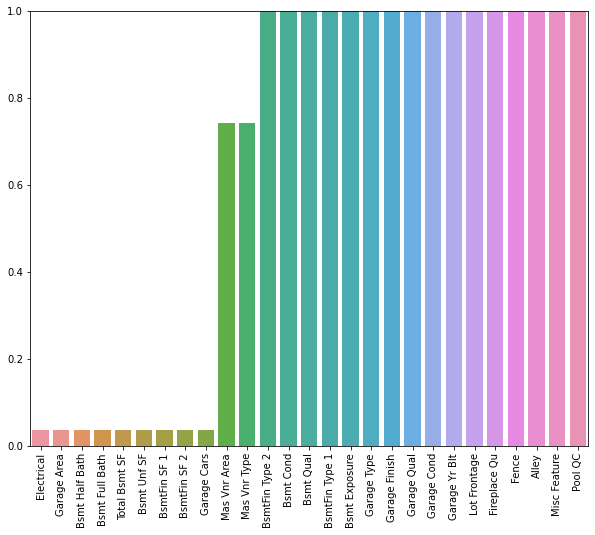

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [13]:
percent_nan[percent_nan < 1]

Electrical        0.035311
Garage Area       0.035311
Bsmt Half Bath    0.035311
Bsmt Full Bath    0.035311
Total Bsmt SF     0.035311
Bsmt Unf SF       0.035311
BsmtFin SF 1      0.035311
BsmtFin SF 2      0.035311
Garage Cars       0.035311
Mas Vnr Area      0.741525
Mas Vnr Type      0.741525
dtype: float64

In [14]:
len(df)

2832

In [15]:
100/len(df)

0.03531073446327684

In [16]:
df[df['Electrical'].isnull()].index

Int64Index([1524], dtype='int64')

In [17]:
#Drop since a single value is 0 
df = df.drop(df[df['Electrical'].isnull()].index)

In [18]:
df[df['Garage Cars'].isnull()].index

Int64Index([2159], dtype='int64')

In [19]:
df = df.drop(df[df['Garage Cars'].isnull()].index)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830 entries, 0 to 2831
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2830 non-null   int64  
 1   MS Zoning        2830 non-null   object 
 2   Lot Frontage     2356 non-null   float64
 3   Lot Area         2830 non-null   int64  
 4   Street           2830 non-null   object 
 5   Alley            192 non-null    object 
 6   Lot Shape        2830 non-null   object 
 7   Land Contour     2830 non-null   object 
 8   Utilities        2830 non-null   object 
 9   Lot Config       2830 non-null   object 
 10  Land Slope       2830 non-null   object 
 11  Neighborhood     2830 non-null   object 
 12  Condition 1      2830 non-null   object 
 13  Condition 2      2830 non-null   object 
 14  Bldg Type        2830 non-null   object 
 15  House Style      2830 non-null   object 
 16  Overall Qual     2830 non-null   int64  
 17  Overall Cond  

In [21]:
percent_nan[percent_nan < 1]

Electrical        0.035311
Garage Area       0.035311
Bsmt Half Bath    0.035311
Bsmt Full Bath    0.035311
Total Bsmt SF     0.035311
Bsmt Unf SF       0.035311
BsmtFin SF 1      0.035311
BsmtFin SF 2      0.035311
Garage Cars       0.035311
Mas Vnr Area      0.741525
Mas Vnr Type      0.741525
dtype: float64

In [22]:
bsmt_str_col = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
df[bsmt_str_col]=df[bsmt_str_col].fillna("None")

(0.0, 1.0)

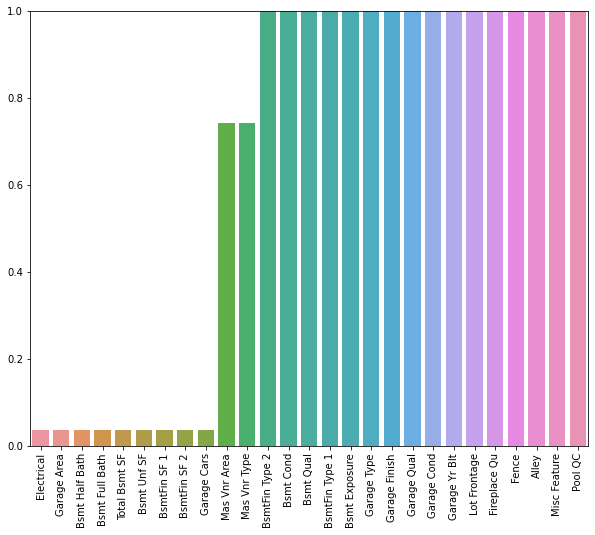

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [24]:
percent_nan[percent_nan < 1]

Electrical        0.035311
Garage Area       0.035311
Bsmt Half Bath    0.035311
Bsmt Full Bath    0.035311
Total Bsmt SF     0.035311
Bsmt Unf SF       0.035311
BsmtFin SF 1      0.035311
BsmtFin SF 2      0.035311
Garage Cars       0.035311
Mas Vnr Area      0.741525
Mas Vnr Type      0.741525
dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830 entries, 0 to 2831
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2830 non-null   int64  
 1   MS Zoning        2830 non-null   object 
 2   Lot Frontage     2356 non-null   float64
 3   Lot Area         2830 non-null   int64  
 4   Street           2830 non-null   object 
 5   Alley            192 non-null    object 
 6   Lot Shape        2830 non-null   object 
 7   Land Contour     2830 non-null   object 
 8   Utilities        2830 non-null   object 
 9   Lot Config       2830 non-null   object 
 10  Land Slope       2830 non-null   object 
 11  Neighborhood     2830 non-null   object 
 12  Condition 1      2830 non-null   object 
 13  Condition 2      2830 non-null   object 
 14  Bldg Type        2830 non-null   object 
 15  House Style      2830 non-null   object 
 16  Overall Qual     2830 non-null   int64  
 17  Overall Cond  

In [26]:
bsmt_num_col = ['Bsmt Half Bath','Bsmt Full Bath','Bsmt Unf SF','Total Bsmt SF','BsmtFin SF 2','BsmtFin SF 1']
df[bsmt_num_col]=df[bsmt_num_col].fillna(0)

In [27]:
percent_nan = percent_missing(df)

In [28]:
df['Bsmt Full Bath'].isnull().sum()

0

(0.0, 1.0)

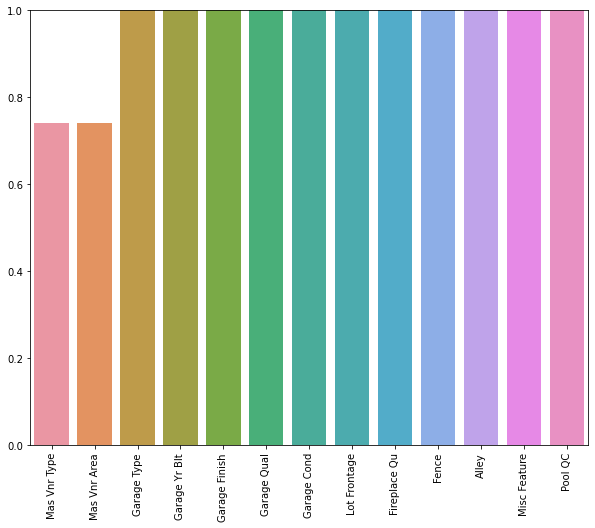

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [30]:
percent_nan[percent_nan < 1]

Mas Vnr Type    0.742049
Mas Vnr Area    0.742049
dtype: float64

In [31]:
Mas_str_type = ['Mas Vnr Type']
df[Mas_str_type] = df[Mas_str_type].fillna("None")

In [32]:
Mas_num_area = ['Mas Vnr Area']
df[Mas_num_area] = df[Mas_num_area].fillna(0)

In [33]:
percent_nan = percent_missing(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

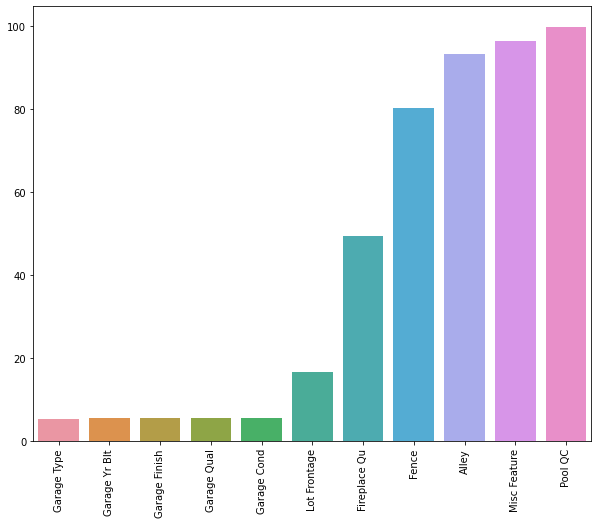

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [35]:
df[['Garage Type','Garage Yr Blt','Garage Finish','Garage Qual','Garage Cond']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond
0,Attchd,1960.0,Fin,TA,TA
1,Attchd,1961.0,Unf,TA,TA
2,Attchd,1958.0,Unf,TA,TA
3,Attchd,1968.0,Fin,TA,TA
4,Attchd,1997.0,Fin,TA,TA
...,...,...,...,...,...
2827,Detchd,1984.0,Unf,TA,TA
2828,Attchd,1983.0,Unf,TA,TA
2829,NaN,NaN,NaN,NaN,NaN
2830,Attchd,1975.0,RFn,TA,TA


In [36]:
garage_num = ['Garage Yr Blt']
df[garage_num]= df[garage_num].fillna(0)

In [37]:
garage_str = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[garage_str] = df[garage_str].fillna('None')

In [38]:
percent_nan = percent_missing(df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Lot Frontage'),
  Text(1, 0, 'Fireplace Qu'),
  Text(2, 0, 'Fence'),
  Text(3, 0, 'Alley'),
  Text(4, 0, 'Misc Feature'),
  Text(5, 0, 'Pool QC')])

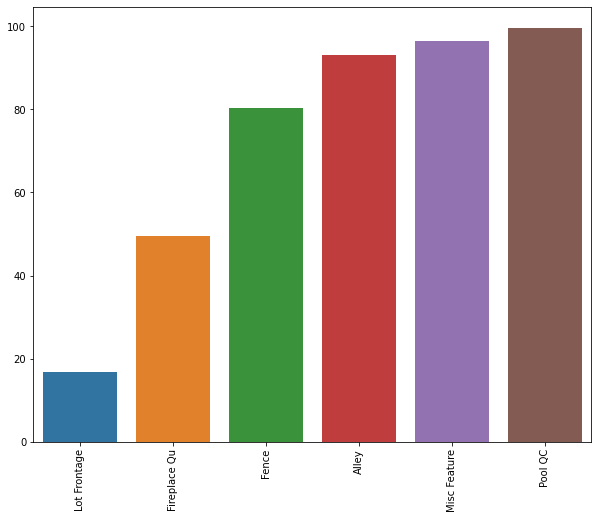

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [40]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [41]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2827,37.0,NaN,GdPrv,NaN,NaN,NaN
2828,NaN,NaN,MnPrv,NaN,NaN,NaN
2829,62.0,NaN,MnPrv,NaN,Shed,NaN
2830,77.0,TA,NaN,NaN,NaN,NaN


In [42]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [43]:
percent_nan = percent_missing(df)

(array([0, 1]), [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

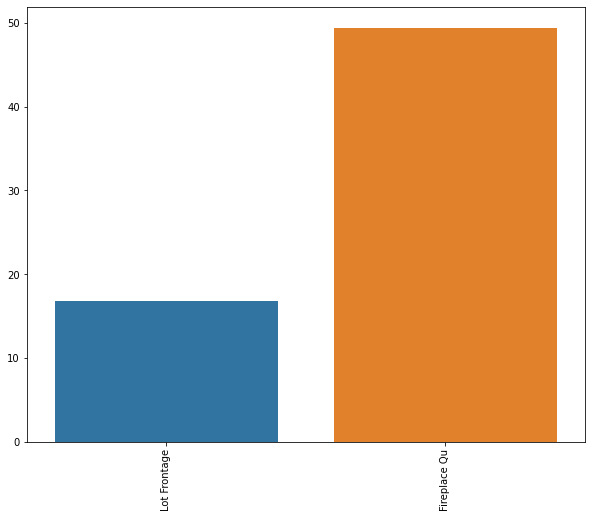

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [45]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu'], dtype='object')

In [46]:
df[['Lot Frontage', 'Fireplace Qu']]

,Lot Frontage,Fireplace Qu
0,141.0,Gd
1,80.0,NaN
2,81.0,NaN
3,93.0,TA
4,74.0,TA
...,...,...
2827,37.0,NaN
2828,NaN,NaN
2829,62.0,NaN
2830,77.0,TA


In [47]:
df['Fireplace Qu']= df['Fireplace Qu'].fillna('None')

In [48]:
percent_nan = percent_missing(df)


(array([0]), [Text(0, 0, 'Lot Frontage')])

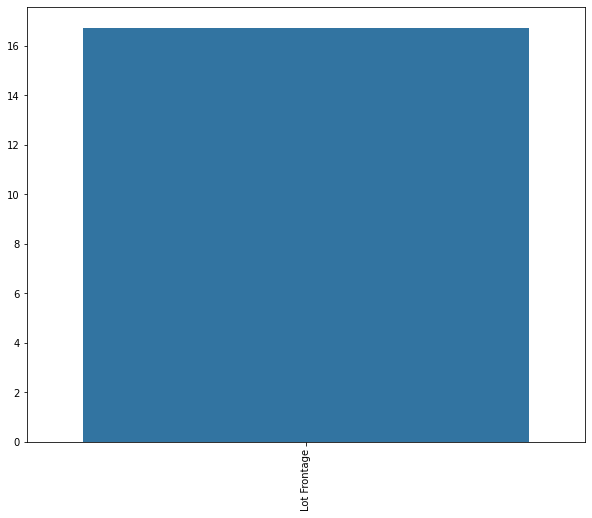

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [50]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

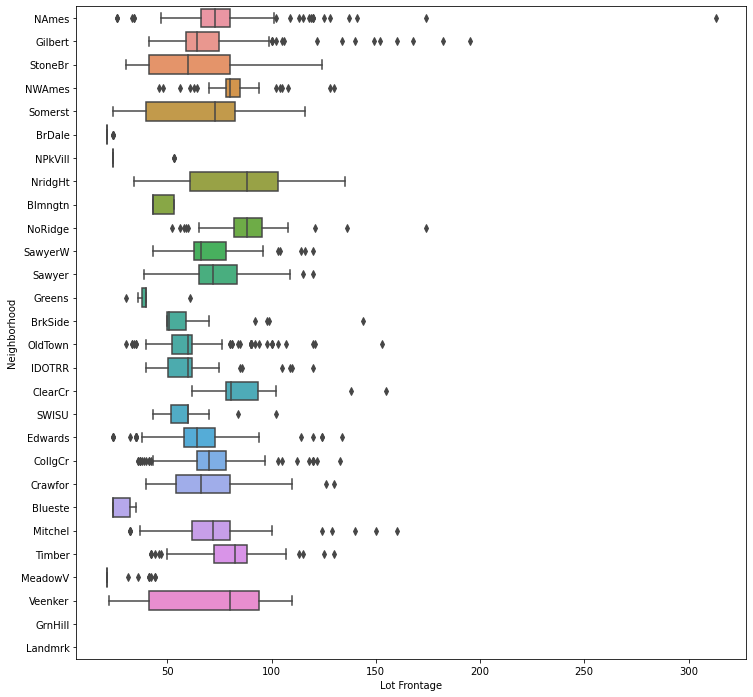

In [51]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Lot Frontage', y = 'Neighborhood', data = df, orient='h')

In [52]:
df.groupby('Neighborhood')['Lot Frontage']

In [53]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.913978
ClearCr    88.150000
CollgCr    71.160550
Crawfor    69.850000
Edwards    64.485549
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     61.451220
Landmrk          NaN
MeadowV    25.606061
Mitchel    72.797619
NAmes      75.000000
NPkVill    28.142857
NWAmes     81.535714
NoRidge    89.170213
NridgHt    82.097222
OldTown    61.524664
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.339806
Somerst    64.797468
StoneBr    61.945946
Timber     78.961538
Veenker    70.714286
Name: Lot Frontage, dtype: float64

### Transform Column


In [54]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [55]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,None,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1985,1985,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,368.0,BLQ,1120.0,0.0,1488.0,GasA,TA,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,4,Typ,0,None,Attchd,1985.0,RFn,2.0,528.0,TA,TA,Y,0,54,0,0,140,0,0,6,2010,WD,Normal,212000
21,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,533.0,Unf,0.0,281.0,814.0,GasA,Ex,Y,SBrkr,814,860,0,1674,1.0,0.0,2,1,3,1,Gd,7,Typ,0,None,Attchd,2000.0,RFn,2.0,663.0,TA,TA,Y,0,96,0,0,0,0,0,1,2010,WD,Normal,216000
22,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578.0,Unf,0.0,426.0,1004.0,GasA,Ex,Y,SBrkr,1004,0,0,1004,1.0,0.0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,700,3,2010,WD,Normal,149000
23,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1971,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,734.0,Unf,0.0,344.0,1078.0,GasA,Ex,Y,SBrkr,1078,0,0,1078,1.0,0.0,1,1,3,1,TA,6,Typ,1,Fa,Attchd,1971.0,Fin,2.0,500.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,6,1981,1981,Hip,WdShake,Plywood,Plywood,BrkFace,653.0,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1686.0,1686.0,GasA,TA,Y,SBrkr,1707,0,0,1707,0.0,0.0,2,1,2,1,TA,6,Typ,1,TA,Attchd,1981.0,RFn,2.0,511.0,TA,TA,Y,574,64,0,0,0,0,0,1,2006,WD,Normal,228000
2801,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,7,5,1990,1991,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Wood,Gd,TA,No,LwQ,1216.0,Unf,0.0,0.0,1216.0,GasA,Ex,Y,SBrkr,1298,1216,0,2514,0.0,0.0,2,1,4,1,TA,8,Typ,0,None,Attchd,1990.0,Fin,2.0,693.0,TA,TA,Y,0,0,0,0,0,0,0,4,2006,WD,Normal,250000
2802,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,Wood,Gd,TA,Av,GLQ,1136.0,BLQ,116.0,129.0,1381.0,GasA,Ex,Y,SBrkr,1403,0,0,1403,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,2000.0,Unf,2.0,470.0,TA,TA,Y,0,173,0,0,0,0,0,10,2006,WD,Normal,202000
2814,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,1Story,5,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,149.0,Unf,0.0,1503.0,1652.0,

In [56]:
df.iloc[21:26]['Lot Frontage']

21     NaN
22     NaN
23     NaN
24    65.0
25    70.0
Name: Lot Frontage, dtype: float64

In [57]:
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [58]:
percent_nan = percent_missing(df)

(array([0]), [Text(0, 0, 'Lot Frontage')])

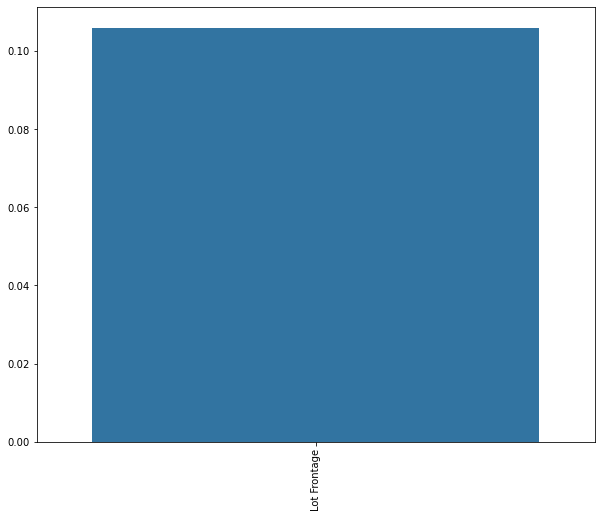

In [59]:
plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

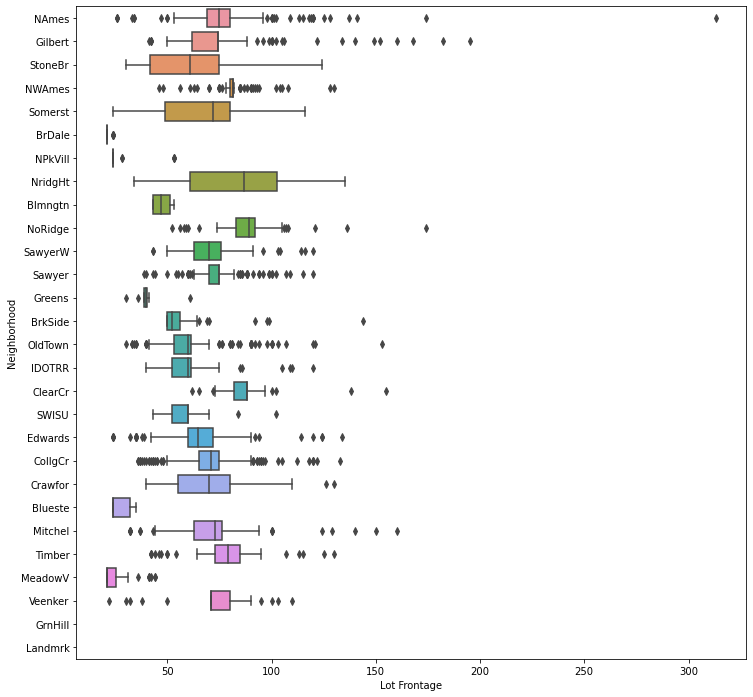

In [60]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Lot Frontage', y = 'Neighborhood', data = df, orient='h')

In [61]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [62]:
percent_nan = percent_missing(df)

In [63]:
percent_nan

Series([], dtype: float64)

In [64]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830 entries, 0 to 2831
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2830 non-null   int64  
 1   MS Zoning        2830 non-null   object 
 2   Lot Frontage     2830 non-null   float64
 3   Lot Area         2830 non-null   int64  
 4   Street           2830 non-null   object 
 5   Lot Shape        2830 non-null   object 
 6   Land Contour     2830 non-null   object 
 7   Utilities        2830 non-null   object 
 8   Lot Config       2830 non-null   object 
 9   Land Slope       2830 non-null   object 
 10  Neighborhood     2830 non-null   object 
 11  Condition 1      2830 non-null   object 
 12  Condition 2      2830 non-null   object 
 13  Bldg Type        2830 non-null   object 
 14  House Style      2830 non-null   object 
 15  Overall Qual     2830 non-null   int64  
 16  Overall Cond     2830 non-null   int64  
 17  Year Built    

In [66]:
df.select_dtypes(include='object')

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2828,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2829,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,None,None,None,None,Y,WD,Normal
2830,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [67]:
df['Lot Shape'].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

### Ranking data attributes from category to numeric 

In [68]:
def Strt (strrt):
    if strrt == 'Pave':
        return 1
    else:
        return 0

df['Street'] = df['Street'].apply(Strt)

def lotshape (lot_shape):
    if lot_shape == 'Reg':
        return 3
    if lot_shape == 'IR1':
        return 2
    if lot_shape == 'IR2':
        return 1
    else:
        return 0
    
df['Lot Shape'] = df['Lot Shape'].apply(lotshape)



In [69]:
df['Land Slope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [70]:
def landslope (land_slope):
    if land_slope == 'Gtl':
        return 2
    if land_slope =='Mod':
        return 1
    else:
        return 0
df['Land Slope'] = df['Land Slope'].apply(landslope)

In [71]:
df['Land Slope'].unique()

array([2, 1, 0], dtype=int64)

In [72]:
df['Exter Qual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [73]:
def exterquality (ExterQual):
    if ExterQual == 'Ex':
        return 4
    if ExterQual == 'Gd':
        return 3
    if ExterQual == 'TA':
        return 2
    if ExterQual == 'Fa':
        return 1
    else:
        return 0
    
df['Exter Qual'] = df['Exter Qual'].apply(exterquality)

In [74]:
df['Exter Cond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [75]:
def extercond (ExterCond):
    if ExterCond == 'Ex':
        return 4
    if ExterCond == 'Gd':
        return 3
    if ExterCond == 'TA':
        return 2
    if ExterCond == 'Fa':
        return 1
    else:
        return 0
    
df['Exter Cond'] = df['Exter Cond'].apply(extercond)

In [76]:
df['Exter Cond'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [77]:
df['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Ex', 'None', 'Fa', 'Po'], dtype=object)

In [78]:
def basementquality (BsmtQual):
    if BsmtQual == 'Ex':
        return 5
    if BsmtQual == 'Gd':
        return 4
    if BsmtQual == 'TA':
        return 3
    if BsmtQual == 'Fa':
        return 2
    if BsmtQual == 'Po':
        return 1
    else:
        return 0 
df['Bsmt Qual'] = df['Bsmt Qual'].apply(basementquality)

In [79]:
df['Bsmt Qual'].unique()

array([3, 4, 5, 0, 2, 1], dtype=int64)

In [80]:
df['Bsmt Cond'].unique()

array(['Gd', 'TA', 'None', 'Po', 'Fa', 'Ex'], dtype=object)

In [81]:
def basementcondition (BsmtCond):
    if BsmtCond == 'Ex':
        return 5
    if BsmtCond == 'Gd':
        return 4
    if BsmtCond == 'TA':
        return 3
    if BsmtCond == 'Fa':
        return 2
    if BsmtCond == 'Po':
        return 1
    else:
        return 0 
df['Bsmt Cond'] = df['Bsmt Cond'].apply(basementcondition)

In [82]:
df['Bsmt Cond'].unique()

array([4, 3, 0, 1, 2, 5], dtype=int64)

In [83]:
df['Bsmt Exposure'].unique()

array(['Gd', 'No', 'Mn', 'Av', 'None'], dtype=object)

In [84]:
def basementexposure (BsmtExp):
    if BsmtExp == 'Gd':
        return 4
    if BsmtExp == 'Av':
        return 3
    if BsmtExp == 'Mn':
        return 2
    if BsmtExp == 'No':
        return 1
    else:
        return 0

df['Bsmt Exposure'] = df['Bsmt Exposure'].apply(basementexposure)

In [85]:
df['Bsmt Exposure'].unique()

array([4, 1, 2, 3, 0], dtype=int64)

In [86]:
df['BsmtFin Type 1'].unique()

array(['BLQ', 'Rec', 'ALQ', 'GLQ', 'Unf', 'LwQ', 'None'], dtype=object)

In [87]:
def Ratingofbasement1 (BsmtFinType1):
    if BsmtFinType1 == 'GLQ':
        return 6
    if BsmtFinType1 == 'ALQ':
        return 5
    if BsmtFinType1 == 'BLQ':
        return 4
    if BsmtFinType1 == 'Rec':
        return 3
    if BsmtFinType1 == 'Lwq':
        return 2
    if BsmtFinType1 == 'Unf':
        return 1
    else:
        return 0
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].apply(Ratingofbasement1)
    

In [88]:
df['BsmtFin Type 1'].unique()

array([4, 3, 5, 6, 1, 0], dtype=int64)

In [89]:
df['BsmtFin Type 2'].unique()

array(['Unf', 'LwQ', 'BLQ', 'Rec', 'None', 'GLQ', 'ALQ'], dtype=object)

In [90]:
def Ratingofbasement2 (BsmtFinType2):
    if BsmtFinType2 == 'GLQ':
        return 6
    if BsmtFinType2 == 'ALQ':
        return 5
    if BsmtFinType2 == 'BLQ':
        return 4
    if BsmtFinType2 == 'Rec':
        return 3
    if BsmtFinType2 == 'Lwq':
        return 2
    if BsmtFinType2 == 'Unf':
        return 1
    else:
        return 0
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].apply(Ratingofbasement2)
    

In [91]:
df['BsmtFin Type 2'].unique()

array([1, 0, 4, 3, 6, 5], dtype=int64)

In [92]:
df['Heating QC'].unique()

array(['Fa', 'TA', 'Ex', 'Gd', 'Po'], dtype=object)

In [93]:
def heatingquality (heatQc):
    if heatQc == 'Ex':
        return 4
    if heatQc == 'Gd':
        return 3
    if heatQc == 'TA':
        return 2
    if heatQc == 'Fa':
        return 1
    else:
        return 0

df['Heating QC'] = df ['Heating QC'].apply(heatingquality)
    

In [94]:
df['Heating QC'].unique()

array([1, 2, 4, 3, 0], dtype=int64)

In [95]:
df['Central Air'].unique()

array(['Y', 'N'], dtype=object)

In [96]:
def centralair (CA):
    if CA == "Y":
        return 1
    else:
        return 0 
df['Central Air'] = df['Central Air'].apply(centralair)

In [97]:
df['Central Air'].unique()

array([1, 0], dtype=int64)

In [98]:
df['Kitchen Qual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa', 'Po'], dtype=object)

In [99]:
def kitchenquality (KitchenQual):
    if KitchenQual == 'Ex':
        return 4
    if KitchenQual == 'Gd':
        return 3
    if KitchenQual == 'TA':
        return 2
    if KitchenQual == 'Fa':
        return 1
    else:
        return 0

df['Kitchen Qual'] = df['Kitchen Qual'].apply(kitchenquality)
    

In [100]:
df['Kitchen Qual'].unique()

array([2, 3, 4, 1, 0], dtype=int64)

In [101]:
df['Fireplace Qu'].unique()

array(['Gd', 'None', 'TA', 'Po', 'Ex', 'Fa'], dtype=object)

In [102]:
def fireplacequality (FireplaceQual):
    if FireplaceQual == 'Ex':
        return 5
    if FireplaceQual == 'Gd':
        return 4
    if FireplaceQual == 'TA':
        return 3
    if FireplaceQual == 'Fa':
        return 2
    if FireplaceQual == 'Po':
        return 1
    else:
        return 0

df['Fireplace Qu'] = df['Fireplace Qu'].apply(fireplacequality)
    

In [103]:
df['Fireplace Qu'].unique()

array([4, 0, 3, 1, 5, 2], dtype=int64)

In [104]:
df['Garage Finish'].unique()

array(['Fin', 'Unf', 'RFn', 'None'], dtype=object)

In [105]:
def garagefinish (GarFin):
    if GarFin == 'Fin':
        return 3
    if GarFin == 'RFn':
        return 2
    if GarFin == 'Unf':
        return 1
    else:
        return 0

df['Garage Finish'] = df['Garage Finish'].apply(garagefinish)

In [106]:
df['Garage Finish'].unique()

array([3, 1, 2, 0], dtype=int64)

In [107]:
df['Garage Qual'].unique()

array(['TA', 'None', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [108]:
def garagequality (GarageQual):
    if GarageQual == 'Ex':
        return 5
    if GarageQual == 'Gd':
        return 4
    if GarageQual == 'TA':
        return 3
    if GarageQual == 'Fa':
        return 2
    if GarageQual == 'Po':
        return 1
    else:
        return 0 

df['Garage Qual'] = df['Garage Qual'].apply(garagequality)

In [109]:
df['Garage Qual'].unique()

array([3, 0, 2, 4, 5, 1], dtype=int64)

In [110]:
df['Garage Cond'].unique()

array(['TA', 'None', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [111]:
def garagecondition(GarageCond):
    if GarageCond == 'Ex':
        return 5
    if GarageCond == 'Gd':
        return 4
    if GarageCond == 'TA':
        return 3
    if GarageCond == 'Fa':
        return 2
    if GarageCond == 'Po':
        return 1
    else:
        return 0 

df['Garage Cond'] = df['Garage Cond'].apply(garagecondition)

In [112]:
df['Garage Cond'].unique()

array([3, 0, 2, 4, 5, 1], dtype=int64)

In [113]:
df['Paved Drive'].unique()

array(['P', 'Y', 'N'], dtype=object)

In [114]:
def paveddrive (pavedDri):
    if pavedDri == 'Y':
        return 2
    if pavedDri == 'P':
        return 1
    else:
        return 0

df['Paved Drive'] = df['Paved Drive'].apply(paveddrive)

In [115]:
df['Paved Drive'].unique()

array([1, 2, 0], dtype=int64)

In [116]:
df.select_dtypes(include='object')

,MS Zoning,Land Contour,Utilities,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Electrical,Functional,Garage Type,Sale Type,Sale Condition
0,RL,Lvl,AllPub,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,CBlock,GasA,SBrkr,Typ,Attchd,WD,Normal
1,RH,Lvl,AllPub,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,SBrkr,Typ,Attchd,WD,Normal
2,RL,Lvl,AllPub,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Typ,Attchd,WD,Normal
3,RL,Lvl,AllPub,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,CBlock,GasA,SBrkr,Typ,Attchd,WD,Normal
4,RL,Lvl,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,Typ,Attchd,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,RL,Lvl,AllPub,CulDSac,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,CBlock,GasA,SBrkr,Typ,Detchd,WD,Normal
2828,RL,Low,AllPub,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,CBlock,GasA,SBrkr,Typ,Attchd,WD,Normal
2829,RL,Lvl,AllPub,Inside,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,PConc,GasA,SBrkr,Typ,None,WD,Normal
2830,RL,Lvl,AllPub,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,CBlock,GasA,SBrkr,Typ,Attchd,WD,Normal


In [117]:
df_nums = df.select_dtypes(exclude='object') 
df_objs = df.select_dtypes(include='object')

In [118]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830 entries, 0 to 2831
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2830 non-null   int64  
 1   Lot Frontage     2830 non-null   float64
 2   Lot Area         2830 non-null   int64  
 3   Street           2830 non-null   int64  
 4   Lot Shape        2830 non-null   int64  
 5   Land Slope       2830 non-null   int64  
 6   Overall Qual     2830 non-null   int64  
 7   Overall Cond     2830 non-null   int64  
 8   Year Built       2830 non-null   int64  
 9   Year Remod/Add   2830 non-null   int64  
 10  Mas Vnr Area     2830 non-null   float64
 11  Exter Qual       2830 non-null   int64  
 12  Exter Cond       2830 non-null   int64  
 13  Bsmt Qual        2830 non-null   int64  
 14  Bsmt Cond        2830 non-null   int64  
 15  Bsmt Exposure    2830 non-null   int64  
 16  BsmtFin Type 1   2830 non-null   int64  
 17  BsmtFin SF 1  

In [119]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830 entries, 0 to 2831
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2830 non-null   object
 1   Land Contour    2830 non-null   object
 2   Utilities       2830 non-null   object
 3   Lot Config      2830 non-null   object
 4   Neighborhood    2830 non-null   object
 5   Condition 1     2830 non-null   object
 6   Condition 2     2830 non-null   object
 7   Bldg Type       2830 non-null   object
 8   House Style     2830 non-null   object
 9   Roof Style      2830 non-null   object
 10  Roof Matl       2830 non-null   object
 11  Exterior 1st    2830 non-null   object
 12  Exterior 2nd    2830 non-null   object
 13  Mas Vnr Type    2830 non-null   object
 14  Foundation      2830 non-null   object
 15  Heating         2830 non-null   object
 16  Electrical      2830 non-null   object
 17  Functional      2830 non-null   object
 18  Garage T

In [120]:
df['MS Zoning']

0       RL
1       RH
2       RL
3       RL
4       RL
        ..
2827    RL
2828    RL
2829    RL
2830    RL
2831    RL
Name: MS Zoning, Length: 2830, dtype: object

In [121]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [122]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [123]:
final_df

,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.000000,31770,1,2,2,6,5,1960,1960,112.0,2,2,3,4,4,4,639.0,1,0.0,441.0,1080.0,1,1,1656,0,0,1656,1.0,0.0,1,0,3,1,2,7,2,4,1960.0,3,2.0,528.0,3,3,1,210,62,0,0,0,0,0,5,2010,215000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.000000,1162

In [124]:
final_df.select_dtypes(include='object')

""
0
1
2
3
4
...
2827
2828
2829
2830


In [125]:
final_df.to_csv('Project_clean_data_actual.csv',index=False)